# Capstone project Battle of the Neighbourhoods
### IBM Data Science course via Coursera

## Project title: Town planning tool using Artificial Intelligence
#### Nikhil Verma

## 1. Introduction / Business Problem (Week 4 requirement)
Town planning is a complex exercise. Town planning authorities need to better understand the local requirements of their citizens to plan expansion of services, infrastructure layout and utility services. It is a critial exercise to allcoate limited resources for maximum benefit. More often than not town planners rely on officers to mannually feed in this information, which is inefficient and prone to bias.

The <b><u>project aims to identify areas where new schools are required</u></b>. For this we have used Sydney, Australia as an example.
This is just one example of a town planning exercise. The same can be extended to building other facilties (like train station, parks, theaters etc.)

Sydney has over 600+ suburbs and over 1400 schools classified as Elementary School, School, High School, Nursery School, Middle School, and Private School.
We created a map by calculating the distance of a school from the nearest suburb-center and clustering the schools based on this distance.

As part of the analysis, initially a list of all the suburbs in Sydeny and schools in those suburbs are obtained. From this data, the nearest school to each suburb is found based on their locations and the distances calculated. After clustering the schools based on the distances, we conclude which suburubs have schools far away for their centres and where new ones can be built to make the community more livable and schools easily accessible to the people of that suburb. K-means clustering algorithm has been used to cluster the schools.

This project aims to provide a visual respesentation (a map) showing how far the schools are from the suburb-centers. This will help the town planners to plan more schools in the suburbs where schools are locted far away and decide where new ones can be built to make the community more livable and schools accessible.

## 2. Data (Week 4 requirement)
We would need the following data:
<li><b>Data 1: Sydney suburb data:</b> The list of suburbs is scraped from the wikipedia page https://en.wikipedia.org/wiki/List_of_Sydney_suburbs and has been cleaned to remove unwatend rows, unwanted delimiters and other noise. The cleaned data is then stored in dataframe for processing and csv file for future use. </li>
<li><b>Data 2: Sydeny school data:</b> We use Foursqure to get the list of schools around each Sydney suburb. This list contains all types of schools and their cooridnates. We filter the data set and process only schools which are of the type: 'Elementary School', 'School', 'High School', 'Nursery School', 'Middle School' and 'Private School'</li> 
<li><b>Data 3: Sydney suburb and school cooridnates:</b> The <b><i>GeoPy</i></b> package is used to get the latitudes and lognitudes of all the suburbs and schools.</li>

The following code explains the how the data has been obtained for each of these

### Data requirement: Sydney suburb data

In [36]:
# import requisite dependencies
import pandas as pd
import numpy as np
import requests # to handle url requests
from bs4 import BeautifulSoup # for scraping data
import re # for regular expressions

In [37]:
# get the list of sydney suburbs from Wikipedia
url2scrape = "https://en.wikipedia.org/wiki/List_of_Sydney_suburbs"
response = requests.get(url=url2scrape,)
soup = BeautifulSoup(response.content, 'lxml')
# print(soup.prettify()) # Used for examining the document struture - we find that our data is contained in paragraphs; We hash it out as the output creates too much clutter; 

# get all the paragraphs in the page
paras=[]
for i in soup.select('p'): # selecting the paragraph element
    paras.append(i.getText()) 

# print(i.getText()) # we hash it out as the output creates too much clutter

# by inspecting paras, we get to know that our actual data starts at paras[5]
paras[5]

# read all the suburbs in a list and clean the list
i=5 # as identified previously
suburbs=[]
for i in range(5, len(paras)):
    word = paras[i]
    suburbs.append(re.split(' - \n| -  \n| - |,', word))

i=0
suburbs_list=[]
for i in range(len(suburbs)):
    j=0
    for j in range(len(suburbs[i])):
        word = suburbs[i][j]
        suburbs_list.append(re.split(' -\n|\n', word))

i=0
suburbs=[]
for i in range(len(suburbs_list)):
    j=0
    for j in range(len(suburbs_list[i])):
        if len(suburbs_list[i][j]) > 0:
            word = suburbs_list[i][j]
            suburbs.append(word.split(', '))
suburbs

[['Abbotsbury'],
 ['Abbotsford'],
 ['Acacia Gardens'],
 ['Agnes Banks'],
 ['Airds'],
 ['Alexandria'],
 ['Alfords Point'],
 ['Allambie Heights'],
 ['Allawah'],
 ['Ambarvale'],
 ['Angus'],
 ['Annandale'],
 ['Annangrove'],
 ['Arcadia'],
 ['Arncliffe'],
 ['Arndell Park'],
 ['Artarmon'],
 ['Ashbury'],
 ['Ashcroft'],
 ['Ashfield'],
 ['Asquith'],
 ['Auburn'],
 ['Austral'],
 ['Avalon Beach'],
 ['Badgerys Creek'],
 ['Balgowlah'],
 ['Balgowlah Heights'],
 ['Balmain'],
 ['Balmain East'],
 ['Bangor'],
 ['Banksia'],
 ['Banksmeadow'],
 ['Bankstown'],
 ['Bankstown Aerodrome'],
 ['Barangaroo'],
 ['Barden Ridge'],
 ['Bardia'],
 ['Bardwell Park'],
 ['Bardwell Valley'],
 ['Bass Hill'],
 ['Baulkham Hills'],
 ['Bayview'],
 ['Beacon Hill'],
 ['Beaconsfield'],
 ['Beaumont Hills'],
 ['Beecroft'],
 ['Belfield'],
 ['Bella Vista'],
 ['Bellevue Hill'],
 ['Belmore'],
 ['Belrose'],
 ['Berala'],
 ['Berkshire Park'],
 ['Berowra'],
 ['Berowra Creek'],
 ['Berowra Heights'],
 ['Berowra Waters'],
 ['Berrilee'],
 ['Beverl

### Data requirement: Sydney suburb coordinates
The below code uses geopy - Nominatim to get the cooridnates of the slected sydney suburbs

In [40]:
from geopy.geocoders import Nominatim # get latitude and longitude for an address

# get the latitude and longitudes of all the suburbs
geolocator = Nominatim(user_agent="sydney_explorer")
suburbs_of_sydney = []
lats = []
longs = []
not_found = []

for i in range(len(suburbs)):
    suburbs_of_sydney.append(suburbs[i][0])
    address = suburbs[i][0] + ', Sydney, Australia'
    # print(address)
    try:
        location = geolocator.geocode(address)
        if location:
            lats.append(location.latitude)
            longs.append(location.longitude)
        if location is None:
            lats.append(np.nan)
            longs.append(np.nan)
    except GeocoderTimedOut as e:
        not_found.append(i)
        lats.append(np.nan)
        longs.append(np.nan)

suburbs_of_sydney

['Abbotsbury',
 'Abbotsford',
 'Acacia Gardens',
 'Agnes Banks',
 'Airds',
 'Alexandria',
 'Alfords Point',
 'Allambie Heights',
 'Allawah',
 'Ambarvale',
 'Angus',
 'Annandale',
 'Annangrove',
 'Arcadia',
 'Arncliffe',
 'Arndell Park',
 'Artarmon',
 'Ashbury',
 'Ashcroft',
 'Ashfield',
 'Asquith',
 'Auburn',
 'Austral',
 'Avalon Beach',
 'Badgerys Creek',
 'Balgowlah',
 'Balgowlah Heights',
 'Balmain',
 'Balmain East',
 'Bangor',
 'Banksia',
 'Banksmeadow',
 'Bankstown',
 'Bankstown Aerodrome',
 'Barangaroo',
 'Barden Ridge',
 'Bardia',
 'Bardwell Park',
 'Bardwell Valley',
 'Bass Hill',
 'Baulkham Hills',
 'Bayview',
 'Beacon Hill',
 'Beaconsfield',
 'Beaumont Hills',
 'Beecroft',
 'Belfield',
 'Bella Vista',
 'Bellevue Hill',
 'Belmore',
 'Belrose',
 'Berala',
 'Berkshire Park',
 'Berowra',
 'Berowra Creek',
 'Berowra Heights',
 'Berowra Waters',
 'Berrilee',
 'Beverley Park',
 'Beverly Hills',
 'Bexley',
 'Bexley North',
 'Bickley Vale',
 'Bidwill',
 'Bilgola Beach',
 'Bilgola Plat

The below code generates a single dataframe with Suburbs, Latitude and Longitude

In [41]:
# Stitching the latitude and longitude of suburbs with sydney_suburbs dataframe
sydney_suburbs = pd.DataFrame(columns=["Suburb","Latitude",'Longitude'])
sydney_suburbs['Suburb'] = suburbs_of_sydney
sydney_suburbs ['Latitude'] = lats
sydney_suburbs ['Longitude'] = longs

# sort the data by Suburb and drop rows which no latitude/ longitude (marked as "nan")
sydney_suburbs.sort_values(by = ["Suburb"], inplace = True)
sydney_suburbs.dropna(inplace = True)

# reset the indext to start from 0
sydney_suburbs.reset_index(inplace = True)
sydney_suburbs.drop(['index'], inplace = True, axis = 1)
sydney_suburbs

,Suburb,Latitude,Longitude
0,Abbotsbury,-33.869285,150.866703
1,Abbotsford,-33.850553,151.129759
2,Acacia Gardens,-33.732459,150.912532
3,Agnes Banks,-33.614508,150.711448
4,Airds,-34.090000,150.826111
...,...,...,...
687,Yarramundi,-33.631817,150.667996
688,Yarrawarrah,-34.056681,151.030888
689,Yennora,-33.864629,150.971150
690,Yowie Bay,-34.050278,151.103333


This code stores the datafram in a .csv file in the IBM Watson cloud storage

In [ ]:
# save the dataframe in IBM cloud storage for later use
from project_lib import Project

# banked out before publishing to Github
SPARK_ENV = ""
ACCESS_TOKEN = ""
PROJECT_TOKEN = ""

try:
    project = Project(SPARK_ENV, ACCESS_TOKEN, PROJECT_TOKEN)
    project.save_data(file_name = "sydney_suburbs.csv", data = sydney_suburbs.to_csv(index=False))
except:
    print("Check IBM cloud to see if the file already exists.")

The below code reads the sydney_suburbs.csv file. Use this code to avoid the time consuming and slow GeoPy call (of course you need to run the GeoPy code above once to crate the file in the IBM storage for the first time).

In [44]:
# load the suburbs from IBM cloud storage
sydney_suburbs_file = project.get_file("sydney_suburbs.csv") 
sydney_suburbs_file.seek(0)
sydney_suburbs = pd.read_csv(sydney_suburbs_file)
sydney_suburbs

,Suburb,Latitude,Longitude
0,Abbotsbury,-33.869285,150.866703
1,Abbotsford,-33.850553,151.129759
2,Acacia Gardens,-33.732459,150.912532
3,Agnes Banks,-33.614508,150.711448
4,Airds,-34.090000,150.826111
...,...,...,...
687,Yarramundi,-33.631817,150.667996
688,Yarrawarrah,-34.056681,151.030888
689,Yennora,-33.864629,150.971150
690,Yowie Bay,-34.050278,151.103333


Getting the Sydney, Australia centre coordinates. This will be used to center the map in folium.

In [45]:
# Obtain the latitude and longitude of Sydney city. This is where we will center our map.
address = 'Sydney, Australia'
geolocator = Nominatim(user_agent="Sydney_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney are -33.8548157, 151.2164539.


Install folium for map functionality

In [46]:
# install and import folium to render the map
!pip install folium -q
import folium

Show the sydney map along with all the suburbs (suburb centres)

In [47]:
# show the sydney map along with all the suburbs (suburb centres)
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, suburb in zip(sydney_suburbs['Latitude'], sydney_suburbs['Longitude'], sydney_suburbs['Suburb']):
    label = '{}'.format(suburb )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#1E90FF',
        fill=True,
        fill_color='#00BFFF',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sydney)
    
map_sydney

### Data requirement: Sydney suburb schools along with coordinates (using Foursquare.com)
Load the Foursquare credentials. This will be used to query the foursquare.com website

In [48]:
# load Foursquare credentials # hidden before pushing to Github
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180605'
LIMIT = 100

In [49]:
# code for getting nearby venues using Foursquare API
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=3000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):

            # build the URL format
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            response = requests.get(url).json()
            results = response["response"]['venues']
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [50]:
# Get the schools near a suburb center 
schools_list = getNearbyVenues(
    names=sydney_suburbs['Suburb'], 
    latitudes=sydney_suburbs['Latitude'], 
    longitudes=sydney_suburbs['Longitude'], 
    radius=3000, 
    categoryIds='4bf58dd8d48988d13b941735') # categoryIds is 4bf58dd8d48988d13b941735 as it returns all the Schools
schools_list

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsbury,-33.869285,150.866703,Edensor Park Public School,-33.882661,150.875801,Elementary School
1,Abbotsbury,-33.869285,150.866703,Bossley Park Primary School,-33.859221,150.882793,Elementary School
2,Abbotsbury,-33.869285,150.866703,Bossley Park High School,-33.867180,150.885542,High School
3,Abbotsbury,-33.869285,150.866703,Cecil Hiils High School,-33.895573,150.851132,High School
4,Abbotsbury,-33.869285,150.866703,Freeman Catholic College,-33.888248,150.864344,School
...,...,...,...,...,...,...,...
18763,Zetland,-33.907662,151.208218,IELTS Test Centre,-33.911843,151.223181,School
18764,Zetland,-33.907662,151.208218,Warwick Institute of Australia,-33.883487,151.202923,College Academic Building
18765,Zetland,-33.907662,151.208218,Randwick Boys High School,-33.925247,151.238742,High School
18766,Zetland,-33.907662,151.208218,Platinum Pre School,-33.915764,151.242085,Daycare


Save the dataframe in a file for later use

In [51]:
# save the dataframe in IBM cloud storage for later use 
from project_lib import Project
try:
    project = Project(SPARK_ENV, ACCESS_TOKEN, PROJECT_TOKEN)
    project.save_data(file_name = "sydney_schools_list.csv",data = schools_list.to_csv(index=False))
except:
    print("Check IBM cloud to see if the file already exists.")

Check IBM cloud to see if the file already exists.


The below code reads the sydney_schools_list.csv file. Use this code to avoid the time consuming and slow Foursquare.com call (of course you need to run the Foursquare.com code above once to crate the file in the IBM storage for the first time).

In [52]:
# load the school list from IBM cloud storage
schools_list_file = project.get_file("sydney_schools_list.csv") 
schools_list_file.seek(0)
schools_list = pd.read_csv(schools_list_file)
schools_list

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsbury,-33.869285,150.866703,Edensor Park Public School,-33.882661,150.875801,Elementary School
1,Abbotsbury,-33.869285,150.866703,Bossley Park Primary School,-33.859221,150.882793,Elementary School
2,Abbotsbury,-33.869285,150.866703,Prairievale Public School,-33.866580,150.891049,Elementary School
3,Abbotsbury,-33.869285,150.866703,Freeman Catholic College,-33.888248,150.864344,School
4,Abbotsbury,-33.869285,150.866703,St Johns Park High School,-33.873604,150.891165,High School
...,...,...,...,...,...,...,...
18761,Zetland,-33.907662,151.208218,Owl's House,-33.921127,151.233273,Preschool
18762,Zetland,-33.907662,151.208218,Platinum Pre School,-33.915764,151.242085,Daycare
18763,Zetland,-33.907662,151.208218,Building Blocks daycare,-33.915854,151.191181,School
18764,Zetland,-33.907662,151.208218,Centre for English Teaching (CET),-33.889193,151.190014,Language School


# This concludes the Week 4 (Introduction/ Business problem & Data) section of the Capstone project

## The code below which is for Week 5 (Methodology/ Results / Discussion / Conclusion) is still under development. Hence, please ignore the below.

In [53]:
# get the size of the school list dataframe
print(schools_list.shape)

# get all the list of Venue Category i.e. type of school and inspect the types to retain.
print(schools_list["Venue Category"].unique())

(18766, 7)
['Elementary School' 'School' 'High School' 'Nursery School' 'Swim School'
 'Music School' 'Driving School' 'Language School'
 'Adult Education Center' 'College Academic Building' 'Religious School'
 'Preschool' 'Middle School' 'Church' 'Private School' 'Student Center'
 'Music Store' 'Mosque' 'General College & University' 'Medical Center'
 'Office' 'Dance Studio' 'Flight School' 'Daycare' 'Cooking School'
 'College Administrative Building' 'Child Care Service' 'Circus School'
 'Business Service' 'Trade School' 'Historic Site' 'Farmers Market'
 'College Technology Building']


In [54]:
# remove the following types of "schools". This list is prepared after reviewing the above list.
venue_values = ['Swim School', 'Music School', 'Driving School', 'Language School',
       'Adult Education Center', 'College Academic Building',
       'Religious School', 'Preschool', 'Church',
       'Student Center', 'Music Store', 'Mosque', 'General College & University',
       'Medical Center', 'Office',
       'Dance Studio', 'Flight School', 'Daycare', 'Cooking School',
       'College Administrative Building', 'Child Care Service',
       'Circus School', 'Business Service', 'Trade School',
       'Historic Site', 'Farmers Market','College Technology Building']

# remove the school types not required.
for venue_value in venue_values:
    index_names = schools_list[schools_list["Venue Category"] == venue_value].index 
    schools_list.drop(index_names, inplace = True) 

# begin the index at 0 again
schools_list.reset_index(drop=True, inplace=True) 

print(schools_list.shape)
# review the remaining categories
print(schools_list["Venue Category"].unique())

(15630, 7)
['Elementary School' 'School' 'High School' 'Nursery School'
 'Middle School' 'Private School']


In [55]:
# view the cleaned school list
schools_list

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsbury,-33.869285,150.866703,Edensor Park Public School,-33.882661,150.875801,Elementary School
1,Abbotsbury,-33.869285,150.866703,Bossley Park Primary School,-33.859221,150.882793,Elementary School
2,Abbotsbury,-33.869285,150.866703,Prairievale Public School,-33.866580,150.891049,Elementary School
3,Abbotsbury,-33.869285,150.866703,Freeman Catholic College,-33.888248,150.864344,School
4,Abbotsbury,-33.869285,150.866703,St Johns Park High School,-33.873604,150.891165,High School
...,...,...,...,...,...,...,...
15625,Zetland,-33.907662,151.208218,The School,-33.917126,151.202472,School
15626,Zetland,-33.907662,151.208218,Rainbow St Public School,-33.924757,151.236747,Elementary School
15627,Zetland,-33.907662,151.208218,Ultimo Public School,-33.877673,151.195376,Elementary School
15628,Zetland,-33.907662,151.208218,Building Blocks daycare,-33.915854,151.191181,School


In [56]:
# A venue can house different types of schools. Hence, we slect only unique venues. Venue category is not important as we know these are some type of schools.
# droping rows with same duplicate Venue
schools_list.drop_duplicates(subset ="Venue", keep = 'first', inplace = True)
# begin the index at 0 again
schools_list.reset_index(drop=True, inplace=True) 
print(schools_list.shape)

(1436, 7)


In [57]:
schools_list

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsbury,-33.869285,150.866703,Edensor Park Public School,-33.882661,150.875801,Elementary School
1,Abbotsbury,-33.869285,150.866703,Bossley Park Primary School,-33.859221,150.882793,Elementary School
2,Abbotsbury,-33.869285,150.866703,Prairievale Public School,-33.866580,150.891049,Elementary School
3,Abbotsbury,-33.869285,150.866703,Freeman Catholic College,-33.888248,150.864344,School
4,Abbotsbury,-33.869285,150.866703,St Johns Park High School,-33.873604,150.891165,High School
...,...,...,...,...,...,...,...
1431,South Coogee,-33.932206,151.253957,Coogee Boys Prep,-33.912935,151.239786,School
1432,South Coogee,-33.932206,151.253957,Marcellin College Randwick,-33.913577,151.241156,High School
1433,St Peters,-33.915947,151.176332,Stanmore Public School,-33.895995,151.164737,Elementary School
1434,Turrella,-33.930271,151.140923,BellDonLaqua Istituto,-33.902040,151.156630,School


In [58]:
# get the nearnest suburb-center to a school
# use spherical geometry to calculate the surface distance between two points.
from geopy.distance import great_circle

venue_lats = schools_list['Venue Latitude']
venue_longs = schools_list['Venue Longitude']
suburb_lats = sydney_suburbs['Latitude']
suburb_longs = sydney_suburbs['Longitude']
suburbs = sydney_suburbs['Suburb']

a,b=schools_list.shape
c,d=sydney_suburbs.shape

nearest_suburb = [None] * a
distance = [None] * a

i=0
for i in range(a):
    venue=(venue_lats[i],venue_longs[i])
    dist=float('inf')
    j=0
    for j in range(c):
        suburb = (suburb_lats[j], suburb_longs[j])
        temp = great_circle(venue, suburb).km
        if(temp<dist):
            dist = temp
            distance[i] = temp
            nearest_suburb[i]=suburbs[j]
            
len(nearest_suburb)

1436

In [59]:
#Combine the nearest suburb data and distance data with the school list
schools_list.insert(loc=7,column="Nearest Suburb", value = nearest_suburb) 
schools_list.insert(loc=8,column="Distance to Nearest Suburb in km", value=distance) 
schools_list

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Nearest Suburb,Distance to Nearest Suburb in km
0,Abbotsbury,-33.869285,150.866703,Edensor Park Public School,-33.882661,150.875801,Elementary School,Edensor Park,0.267537
1,Abbotsbury,-33.869285,150.866703,Bossley Park Primary School,-33.859221,150.882793,Elementary School,Bossley Park,0.366895
2,Abbotsbury,-33.869285,150.866703,Prairievale Public School,-33.866580,150.891049,Elementary School,Bossley Park,0.778895
3,Abbotsbury,-33.869285,150.866703,Freeman Catholic College,-33.888248,150.864344,School,Bonnyrigg Heights,0.584868
4,Abbotsbury,-33.869285,150.866703,St Johns Park High School,-33.873604,150.891165,High School,Greenfield Park,0.199593
...,...,...,...,...,...,...,...,...,...
1431,South Coogee,-33.932206,151.253957,Coogee Boys Prep,-33.912935,151.239786,School,Randwick,0.173311
1432,South Coogee,-33.932206,151.253957,Marcellin College Randwick,-33.913577,151.241156,High School,Randwick,0.062139
1433,St Peters,-33.915947,151.176332,Stanmore Public School,-33.895995,151.164737,Elementary School,Stanmore,0.271871
1434,Turrella,-33.930271,151.140923,BellDonLaqua Istituto,-33.902040,151.156630,School,Petersham,0.845117


In [60]:
from sklearn.cluster import KMeans

# cluster the schools based on the distance from the suburb centre. Cluster into 5 clusters
clustering = pd.DataFrame(columns=['Distance to Nearest Suburb in km'])
clustering['Distance to Nearest Suburb in km'] = schools_list['Distance to Nearest Suburb in km']
kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering)

In [61]:
# get the number of clusters as a means to check we are on the right track
clusters = kmeans.labels_
len(clusters)

1436

In [62]:
# append the school list with the cluster found via the K-means algorithm
schools_list.insert(loc=9,column="Cluster Labels", value=clusters) 
schools_list

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Nearest Suburb,Distance to Nearest Suburb in km,Cluster Labels
0,Abbotsbury,-33.869285,150.866703,Edensor Park Public School,-33.882661,150.875801,Elementary School,Edensor Park,0.267537,3
1,Abbotsbury,-33.869285,150.866703,Bossley Park Primary School,-33.859221,150.882793,Elementary School,Bossley Park,0.366895,3
2,Abbotsbury,-33.869285,150.866703,Prairievale Public School,-33.866580,150.891049,Elementary School,Bossley Park,0.778895,4
3,Abbotsbury,-33.869285,150.866703,Freeman Catholic College,-33.888248,150.864344,School,Bonnyrigg Heights,0.584868,1
4,Abbotsbury,-33.869285,150.866703,St Johns Park High School,-33.873604,150.891165,High School,Greenfield Park,0.199593,3
...,...,...,...,...,...,...,...,...,...,...
1431,South Coogee,-33.932206,151.253957,Coogee Boys Prep,-33.912935,151.239786,School,Randwick,0.173311,3
1432,South Coogee,-33.932206,151.253957,Marcellin College Randwick,-33.913577,151.241156,High School,Randwick,0.062139,3
1433,St Peters,-33.915947,151.176332,Stanmore Public School,-33.895995,151.164737,Elementary School,Stanmore,0.271871,3
1434,Turrella,-33.930271,151.140923,BellDonLaqua Istituto,-33.902040,151.156630,School,Petersham,0.845117,4


In [63]:
# view the number of schools in each cluster
schools_list['Cluster Labels'].value_counts()

1    459
3    376
4    345
2    201
0     55
Name: Cluster Labels, dtype: int64

In [65]:
# get some basic cluster metrics - this is where we can make inferences for business use
cluster_list = []
for i in range(5):
    cluster_list.append(pd.DataFrame(schools_list.loc[(schools_list['Cluster Labels'] == i)]))
    print("======== Cluster {} =========".format(i))
    print(cluster_list[i]['Distance to Nearest Suburb in km'].describe())
    print("\n")

======== Cluster 0 =========
count    55.000000
mean      2.035579
std       0.366331
min       1.664811
25%       1.776395
50%       1.938703
75%       2.116459
max       3.158986
Name: Distance to Nearest Suburb in km, dtype: float64


======== Cluster 1 =========
count    459.000000
mean       0.559247
std        0.084545
min        0.409595
25%        0.490137
50%        0.559801
75%        0.626632
max        0.710077
Name: Distance to Nearest Suburb in km, dtype: float64


======== Cluster 2 =========
count    201.000000
mean       1.262058
std        0.147316
min        1.064892
25%        1.141335
50%        1.222704
75%        1.368328
max        1.634787
Name: Distance to Nearest Suburb in km, dtype: float64


======== Cluster 3 =========
count    376.000000
mean       0.259725
std        0.102752
min        0.015883
25%        0.173880
50%        0.278612
75%        0.346210
max        0.409258
Name: Distance to Nearest Suburb in km, dtype: float64


======== Cluster 4 =====

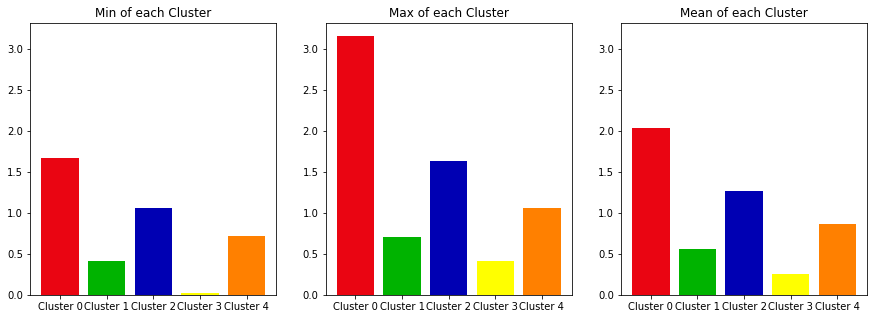

In [66]:
# more analysis to understand the clusters
# the below code is to display the clusteer metrics in the form of bar charts
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
axesy = plt.axes() # this is required to ensure that the y-axis is same for all the charts for better comparision purposes

def subplotter(position, data_index, title="Plot"):
    plt.subplot(position, sharey=axesy)
    plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
        [cluster_list[0]['Distance to Nearest Suburb in km'].describe().iloc[data_index],
         cluster_list[1]['Distance to Nearest Suburb in km'].describe().iloc[data_index],
         cluster_list[2]['Distance to Nearest Suburb in km'].describe().iloc[data_index],
         cluster_list[3]['Distance to Nearest Suburb in km'].describe().iloc[data_index],
         cluster_list[4]['Distance to Nearest Suburb in km'].describe().iloc[data_index]],
            color=('#ea0512', '#00b300', '#0000b3', '#ffff00','#ff8000')) # red / green / blue/ yellow / orange
    plt.title(title)

# plot the min, max and mean of each cluster for visual inspection
subplotter(131, 3, 'Min of each Cluster')
subplotter(132, 7, 'Max of each Cluster')
subplotter(133, 1, 'Mean of each Cluster')

plt.show()

In [67]:
# prepare folium map to show the suburb-centre and the school clusters on the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# red / green / blue/ yellow / orange
color_map = ['#ea0512','#00b300','#0000b3','#ffff00','#ff8000']

for i in range(5):
    for lat, lon, venue, cluster, suburb in zip(cluster_list[i]['Venue Latitude'], cluster_list[i]['Venue Longitude'], cluster_list[i]['Venue'],cluster_list[i]['Cluster Labels'],cluster_list[i]['Suburb']):
        label = folium.Popup(venue +', '+ suburb + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=color_map[i],
            fill=True,
            fill_color=color_map[i],
            fill_opacity=0.8).add_to(map_clusters)
        
for lat, lng, suburb in zip(sydney_suburbs['Latitude'], sydney_suburbs['Longitude'], sydney_suburbs['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#2f1012',
        fill=True,
        fill_color='#2f1012',
        fill_opacity=0.9,
        parse_html=False).add_to(map_clusters)


In [68]:
# the below code adds a floating legend
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#ea0512;opacity:0.7;'></span>Cluster 1</li>
    <li><span style='background:#00b300;opacity:0.7;'></span>Cluster 2</li>
    <li><span style='background:#0000b3;opacity:0.7;'></span>Cluster 3</li>
    <li><span style='background:#ffff00;opacity:0.7;'></span>Cluster 4</li>
    <li><span style='background:#ff8000;opacity:0.7;'></span>Cluster 5</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map_clusters.get_root().add_child(macro)